# ***************************  Final Project  *******************************************
By Kareem Zahra

# Medical Appointment No Shows : Why patients miss their scheduled appointments?

# 1 - Data Collection

### Introduction

Data Dictionary

01 - PatientId

    Identification of a patient.

02 - AppointmentID

    Identification of each appointment.

03 - Gender

    F or M : Female or Male.

04 - ScheduledDay

    The day of the actual appointment, when they have to visit the doctor.

05 - AppointmentDay

    The day where the appointment registered .

06 - Age

    How old is the patient.

07 - Neighbourhood

    Where the appointment takes place.

08 - Scholarship

    1 or 0 : either the patient takes part in the Bolsa Familia Program( social welfare program of the Government of Brazil) an initiative that provides small cash transfers in exchange for keeping children in school and  completing health care visits.


09 - Hipertension

    1 or 0 : Is the patient Hypertnesive or not.

10 - Diabetes

    1 or 0 : Is the patient Diabetic or not.

11 - Alcoholism

    1 or 0 : Is the patient Alcholic or not.

12 - Handcap

    1 or 0 : Is the patient Handicapped or not.

13 - SMS_received

    1 or 0 : Patient reminded by a message or not.

14 - No-show

    Yes or No.
    


#### Importing All Libraries 

In [8]:
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy import stats, special
#from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
#from seaborn import pairplot, heatmap
#from sklearn import tree
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import classification_report
#mport statsmodels.formula.api as smf
#import statsmodels.api as smf


Populating the interactive namespace from numpy and matplotlib


#### Read csv file into panda 

In [4]:
ns = pd.read_csv("noshow.csv") # NO Show is ns to be easily recalled.

####  Take a look at the data and the first few rows

In [3]:
ns.shape # Number of rows and columns. 

(110527, 14)

In [4]:
ns.head() # First 5 rows of the data.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# 2 - Some Visualizations and Descriptive Statistics

In [5]:
ns.describe() # View some basic statistical details.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
ns.describe(include='all') # More descriptive statistics.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.920000e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172615e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173180e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439170e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


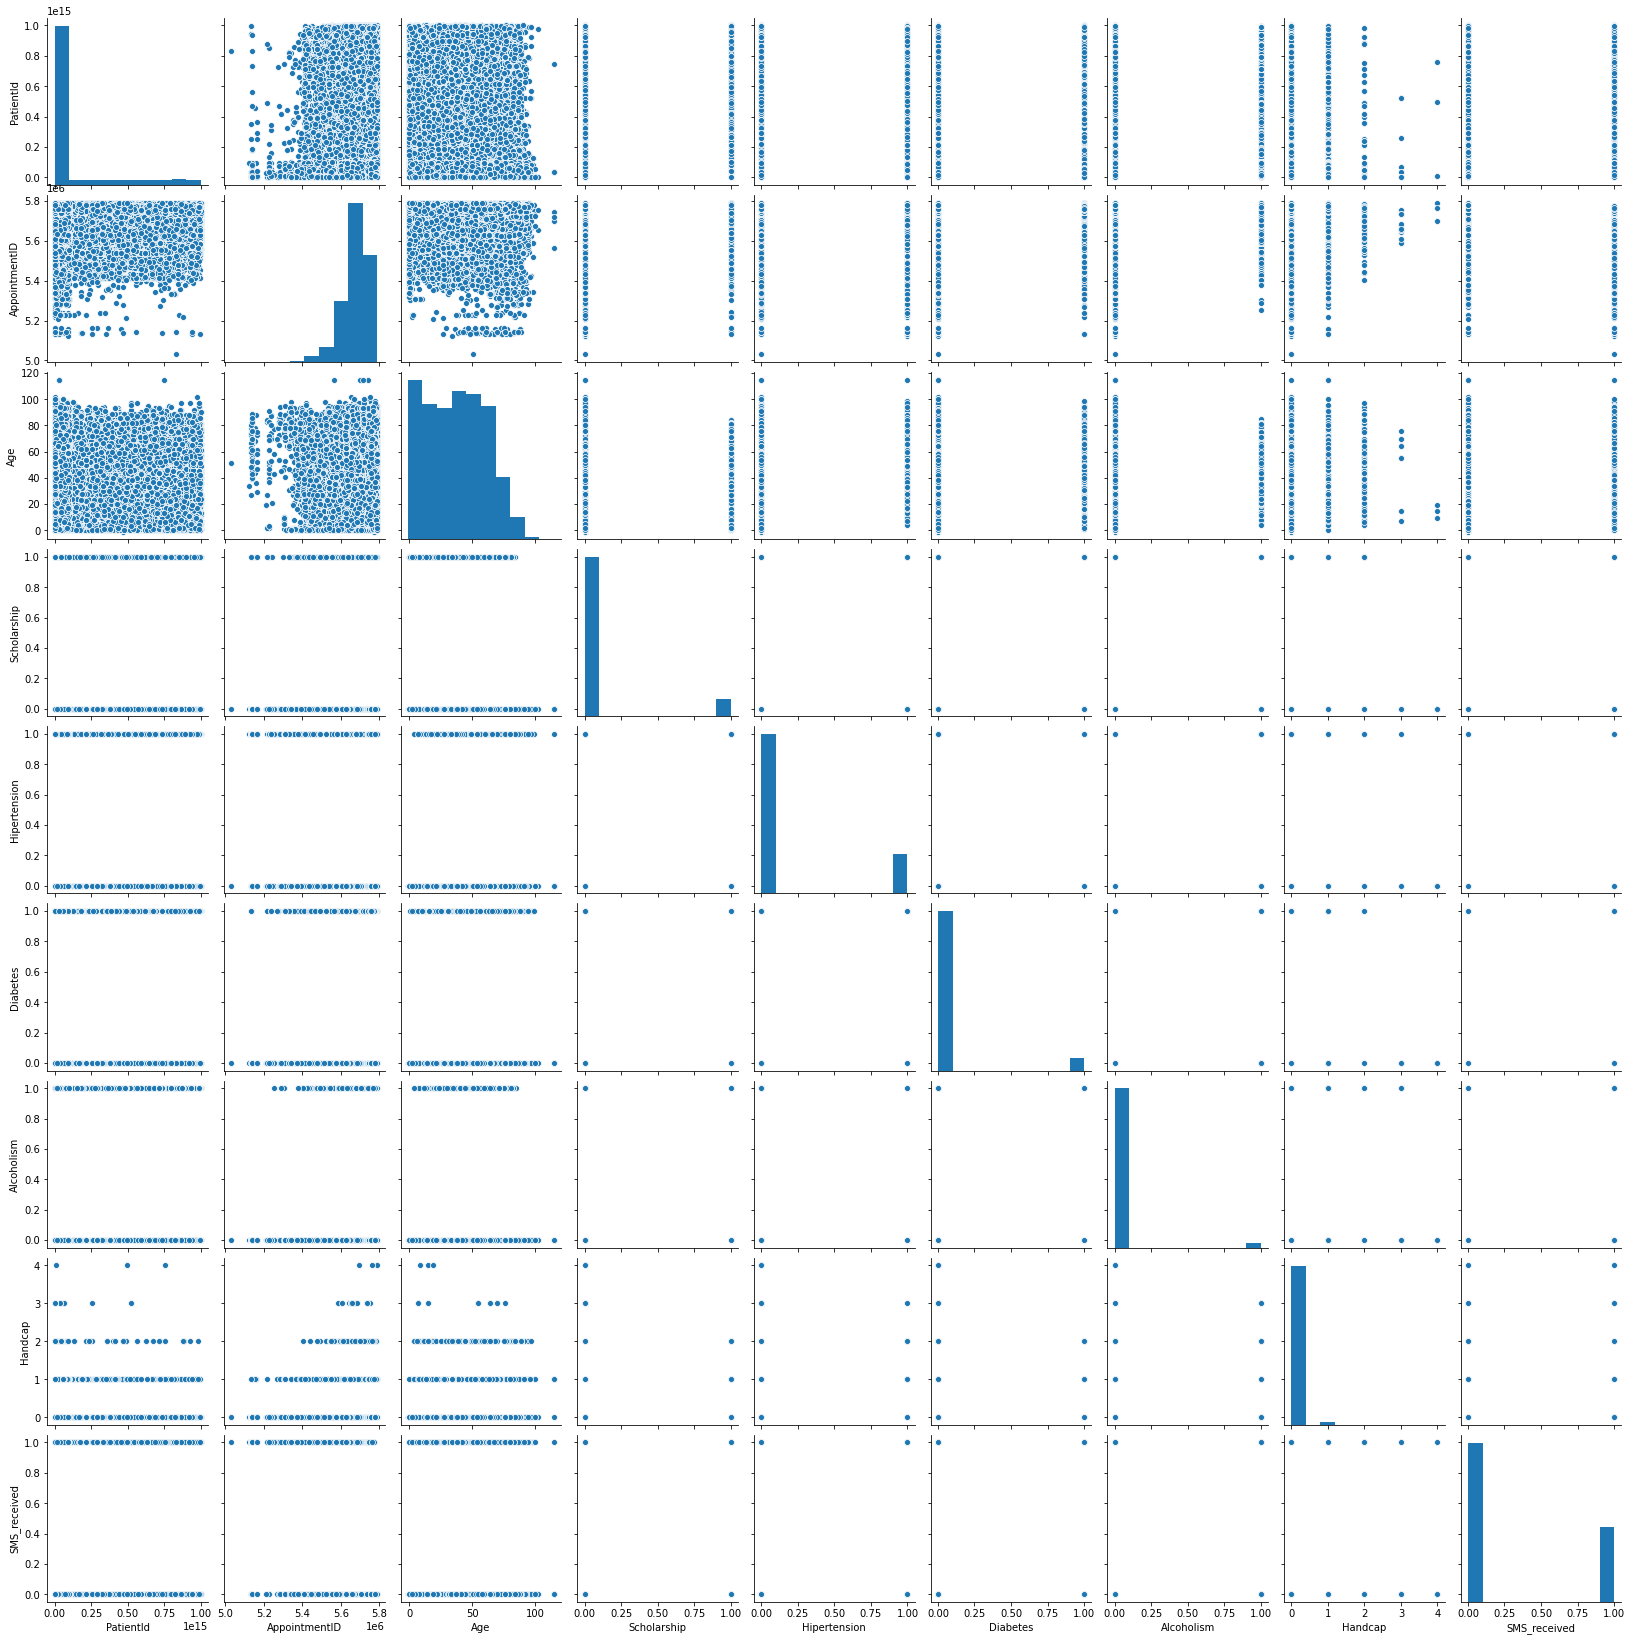

In [7]:
sns.pairplot(ns) # Scatter matrices to visualize every column of the data as a scatterplot.

In [8]:
pandas_profiling.ProfileReport(ns)

# 3 - Data cleanup (handling missing values, duplicates, errors, outliers)

### 3b - Mayby some visualizations again for correlations, heatmaps

#### Checking for any missing values or duplicates

In [8]:
ns.isnull().values.any() # Any null values?

False

In [9]:
ns.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
ns.duplicated().any() # Any duplicated values?

False

In [11]:
ns.duplicated().sum()

0

#### Checking for any errors or outliers

In [12]:
ns.dtypes  # What is our data type?

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [13]:
ns.info() #  Information about the data including the index dtype and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
ns.describe() # Looking for outliers.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
ns[ns["Age"].isin([115,-1])] # the max and min values from above.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃƒO JOSÃ‰,0,1,0,0,0,1,No
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃƒO,0,0,0,0,0,0,No


In [16]:
ns.iloc[99832] # The specific location for the negative value.

PatientId                  4.65943e+14
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                   ROMÃƒO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

In [17]:
ns[ns['Age']>110] # Any age values greater than 110.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196320e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482350e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃƒO JOSÃ‰,0,1,0,0,0,1,No


In [18]:
ns[ns['Age']<0] # Any age values less than 0.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃƒO,0,0,0,0,0,0,No


In [19]:
ns.Age.value_counts()  # Counting all the Age values.

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [20]:
ns.corr() # Which values in the columns move together?

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


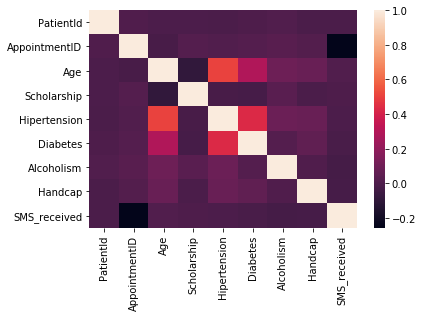

In [21]:
sns.heatmap(ns.corr()) # Visulazing the correlation on a heatmap.

##### Some errors found:

- Patient Id column is a float.

- Schedule day and Appointment day columns are not date.

- No-Show column is an object.

- Age can't be negative and very unlikely to above 110.

- Some columns header with spelling mistakes and misleading title.

# 4 - Feature creations/ Feature selection (if you change or add new features or drop a few features)

##### Feature selection :

- Change Pateint Id from float to integer.

- Change Schedule day and Appointment day from object to date.

- Change No-Show from object to integer.

- Drop the rows with Age of -1 and 115.
(I'll go with the assumption that 115 can be 11.5, but I'm not sure so I'll drop those 5 rows,as 4 of those rows are for the same patient)

- Correct the column typos and rename the columns header to be clear.

In [22]:
ns['PatientId'] = ns['PatientId'].astype('int64') # from float to integer.

In [23]:
ns['ScheduledDay'] = pd.to_datetime(ns['ScheduledDay'], infer_datetime_format=True) #from object to date.
ns['AppointmentDay'] = pd.to_datetime(ns['AppointmentDay'], infer_datetime_format=True) #from object to date.

In [24]:
ns['No-show'] = ns['No-show'].map({'No': 1, 'Yes': 0}) # from object to integer.

#Yes or 0 in No-show means : that  the patient didn't show up for the appointment.

In [25]:
ns = ns[(ns['Age'] <115 ) & (ns['Age'] > -1)] #Drop the rows with Age errors.

In [26]:
ns = ns.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'}) # correct the spelling mistakes.

In [27]:
ns.columns = ['Id', 'Appointment', 'Gender', 'Patient Arrival',
       'Scheduled Day', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'Notified', 'Noshow'] 

# Changing the columns names to be more clear.

# Remove the dash from No-Show and make it Noshow.

In [28]:
ns # Let's have a look....is it readable now?

,Id,Appointment,Gender,Patient Arrival,Scheduled Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Notified,Noshow
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841190000000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3596270000000,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,15576600000000,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,92134900000000,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1


# 5 - Data Visualization (not necessary for everything, but as a validation that data is ready to be modeled)

In [29]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               110521 non-null  int64         
 1   Appointment      110521 non-null  int64         
 2   Gender           110521 non-null  object        
 3   Patient Arrival  110521 non-null  datetime64[ns]
 4   Scheduled Day    110521 non-null  datetime64[ns]
 5   Age              110521 non-null  int64         
 6   Neighbourhood    110521 non-null  object        
 7   Scholarship      110521 non-null  int64         
 8   Hypertension     110521 non-null  int64         
 9   Diabetes         110521 non-null  int64         
 10  Alcoholism       110521 non-null  int64         
 11  Handicap         110521 non-null  int64         
 12  Notified         110521 non-null  int64         
 13  Noshow           110521 non-null  int64         
dtypes: datetime64[ns](2)

### Visualize the relation between columns on a count plot
- compare it with show/no show  to the appointment.

In [30]:
ns.Noshow.value_counts() # 0 in No-show means : that the patient didn't show up for the appointment.

# 88,205 show up for their appointment.

1    88205
0    22316
Name: Noshow, dtype: int64

In [31]:
ns.Scholarship.value_counts() # 10,861 received the scholarship.

0    99660
1    10861
Name: Scholarship, dtype: int64

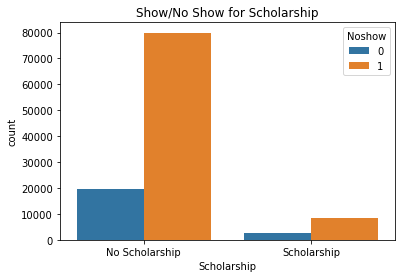

In [32]:
dv7 = sns.countplot(x=ns.Scholarship, hue=ns.Noshow)
dv7.set_title("Show/No Show for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
dv7.set_xticklabels(x_ticks_labels)
plt.show()

# Patients who did not get the scholarship, show up to thier appointments more.

# 0 in No-show means : that the patient didn't show up for the appointment.

In [33]:
ns.Hypertension.value_counts() # 21,800 with high blood pressure.

0    88721
1    21800
Name: Hypertension, dtype: int64

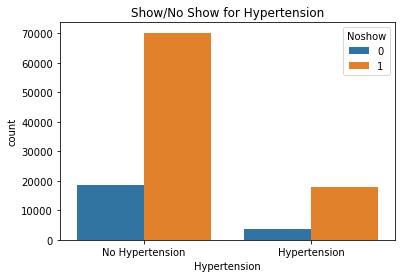

In [34]:
dv8 = sns.countplot(x=ns.Hypertension, hue=ns.Noshow)
dv8.set_title("Show/No Show for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
dv8.set_xticklabels(x_ticks_labels)
plt.show()

# Non-hypertensive patients show up more to thier appointments.

# 0 in No-show means : that the patient didn't show up for the appointment.

In [35]:
ns.Diabetes.value_counts() # 7943 with high blood sugar.

0    102578
1      7943
Name: Diabetes, dtype: int64

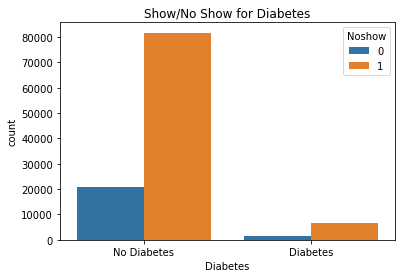

In [36]:
dv9 = sns.countplot(x=ns.Diabetes, hue=ns.Noshow)
dv9.set_title("Show/No Show for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
dv9.set_xticklabels(x_ticks_labels)
plt.show()

# Non-diabetic patients show up more to thier appointments.

# 0 in No-show means : that the patient didn't show up for the appointment.

In [37]:
ns.Alcoholism.value_counts() # 3360 who compulsively abuse alcohol.

0    107161
1      3360
Name: Alcoholism, dtype: int64

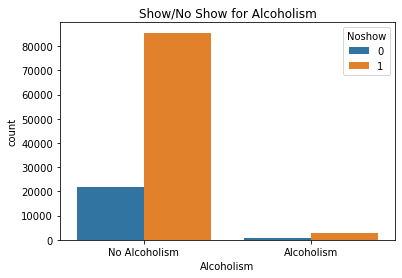

In [38]:
dv10 = sns.countplot(x=ns.Alcoholism, hue=ns.Noshow)
dv10.set_title("Show/No Show for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
dv10.set_xticklabels(x_ticks_labels)
plt.show()

# Non Alcoholic patients show up more to their appointments.

# 0 in No-show means : that the patient didn't show up for the appointment.

In [39]:
ns.Notified.value_counts() # 35,481 got a reminder before their appointment.

0    75040
1    35481
Name: Notified, dtype: int64

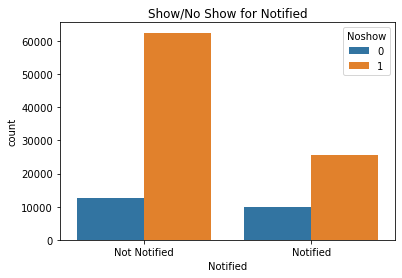

In [40]:
dv12 = sns.countplot(x=ns.Notified, hue=ns.Noshow)
dv12.set_title("Show/No Show for Notified")
x_ticks_labels=['Not Notified', 'Notified']
dv12.set_xticklabels(x_ticks_labels)
plt.show()

# Patients who did not get notified, show up to thier appointments more.

# 0 in No-show means : that the patient didn't show up for the appointment.

# 6 - All data in a single data frame

In [41]:
df = pd.DataFrame(ns) # Putting this all into a dataframe.

- Drop useless columns that makes no difference in our data and to make modeling better.

In [42]:
df.drop(['Patient Arrival', 'Scheduled Day','Neighbourhood', 'Gender'], axis=1, inplace=True)

# Drop date, time , place and gender as there is no difference or effect on the result.

In [43]:
df

,Id,Appointment,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Notified,Noshow
0,29872500000000,5642903,62,0,1,0,0,0,0,1
1,558998000000000,5642503,56,0,0,0,0,0,0,1
2,4262960000000,5642549,62,0,0,0,0,0,0,1
3,867951000000,5642828,8,0,0,0,0,0,0,1
4,8841190000000,5642494,56,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000,5651768,56,0,0,0,0,0,1,1
110523,3596270000000,5650093,51,0,0,0,0,0,1,1
110524,15576600000000,5630692,21,0,0,0,0,0,1,1
110525,92134900000000,5630323,38,0,0,0,0,0,1,1


# 7 - Train/Test Split

In [44]:
train1, test1 = model_selection.train_test_split(df)

In [45]:
len(test1)/(len(train1)+len(test1))

0.25000678604066195

In [ ]:
df = df.sample(frac = 1)

In [ ]:
train1[train1['NoShow']=1]
len(train1[train1['NoShow']=1])  # only with train

In [46]:
train1

,Id,Appointment,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Notified,Noshow
43090,826563000000,5554756,2,0,0,0,0,0,0,1
24504,74464800000000,5722720,63,0,1,0,0,0,1,0
17713,375473000000,5653036,73,0,1,1,0,0,0,1
28243,72920000000000,5648704,54,0,0,0,0,0,1,1
6951,288219000000000,5567608,18,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
29428,341694000000,5613991,20,0,0,0,0,0,1,1
55648,544492000000000,5725871,26,0,0,0,0,0,1,0
87111,47585200000000,5537540,19,0,0,0,0,0,1,1
6497,371543000000,5722325,50,0,0,0,0,0,1,1


In [47]:
test1

,Id,Appointment,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,Notified,Noshow
69432,94526900000000,5648390,45,1,0,0,0,0,1,1
31772,9866480000000,5659538,20,0,0,0,0,0,0,0
75486,852567000000000,5667416,44,0,0,0,0,0,0,0
36696,92696600000000,5705956,31,0,1,0,0,0,0,1
21044,659468000000,5716726,27,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
100619,86576000000000,5755121,12,0,0,0,0,0,1,1
100234,748553000000,5618609,31,0,0,0,0,0,1,1
40915,92557100000000,5589822,52,0,0,0,0,0,0,1
44732,4233180000000,5694475,0,0,0,0,0,0,1,1


# 8 - Train the model using training data

We run the linear regression on the training set only:


In [48]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(train1.index,train1['Noshow'] )

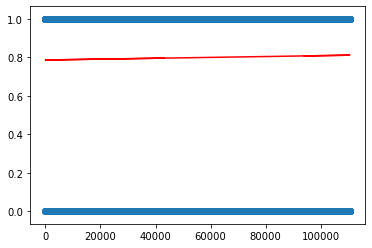

In [49]:
train_regr = intercept + slope * train1.index

scatter(train1.index,train1['Noshow'])
plt.plot(train1.index,train_regr, color='red');

In [50]:
metrics.r2_score(train1['Noshow'], train_regr)

0.0003236900711334201

In [51]:
metrics.mean_absolute_error(train1['Noshow'], train_regr)

0.3213119129673054

In [52]:
metrics.r2_score(test1['Noshow'], intercept + slope*test1.index)

0.00015637274943891555

In [53]:
metrics.mean_absolute_error(test1['Noshow'], intercept + slope*test1.index)

0.3230417165494914

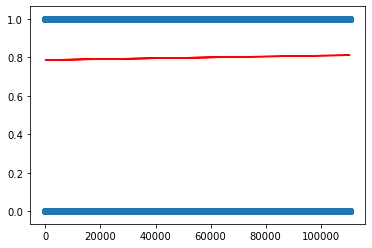

In [54]:
train_regr = intercept + slope * train1.index

scatter(test1.index,test1['Noshow'])
plt.plot(test1.index,intercept + slope*test1.index, color='red');

In [55]:
X = df['Notified'].values.reshape(-1,1)  ## Annoying hack you have to do when you have one independent variable
y = df['Noshow']

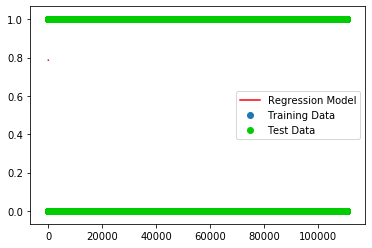

In [56]:
scatter(train1.index,train1['Noshow'],label='Training Data')
scatter(test1.index,test1['Noshow'],color='#00CC00',label='Test Data')
plt.plot(X,intercept + slope*X, color='red',label='Regression Model')
plt.legend();

In [57]:
print('R-squared value is', metrics.r2_score(y, intercept + slope*X))
print('MAE is', metrics.mean_absolute_error(y, intercept + slope*X))
print('Mean and std are', df['Noshow'].mean(), df['Noshow'].std())

R-squared value is -0.000855194875363896
MAE is 0.3292906382936055
Mean and std are 0.7980836221170637 0.4014319522632752


### Linear Regression with Statsmodels

In [58]:
import statsmodels.formula.api as smf  # import the formula tools

model = smf.ols(data = df, formula = "y ~ X")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result = model.fit()  # create a RegressionResults object

In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1797.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:58:56   Log-Likelihood:                -55056.
No. Observations:              110521   AIC:                         1.101e+05
Df Residuals:                  110519   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8330      0.001    573.030      0.000       0.830       0.836
X             -0.1087      0.003    -42.387      0.000      -0.114      -0.104
==============================================================================
Omnibus:                    22211.617   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39020.528
Skew:                          -1.452   Prob(JB):                         0.00
Kurtosis:                       3.211   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying Logistic Regression

In [60]:
X = df['Notified'].values.reshape(-1,1)  ## Annoying hack you have to do when you have one independent variable
y = df['Noshow']

In [61]:
df_model = linear_model.LogisticRegression(solver='liblinear')
df_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
dfnew = np.arange(1,10).reshape(-1,1)
df_model.predict(dfnew)

array([1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
df_0 = df_model.intercept_[0]
print(df_0)
df_1 = df_model.coef_[0][0]
print(df_1)

1.6067938508218704
-0.6410775231876132


In [64]:
df_model.predict_proba(dfnew)

array([[0.27573515, 0.72426485],
       [0.41954565, 0.58045435],
       [0.5784561 , 0.4215439 ],
       [0.72262424, 0.27737576],
       [0.83182175, 0.16817825],
       [0.90375587, 0.09624413],
       [0.94688654, 0.05311346],
       [0.97130246, 0.02869754],
       [0.98467617, 0.01532383]])

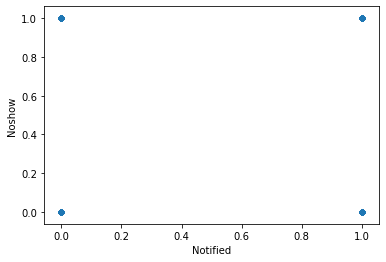

In [65]:
df.plot.scatter('Notified', 'Noshow')

### Logistic Regression with Multiple Features

In [66]:
X2 = df[['Hypertension', 'Diabetes']]# no need to do the .reshape hack this time, as we have more than one independent variable

df_log_model_2 = linear_model.LogisticRegression(solver='liblinear')
df_log_model_2.fit(X2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
Hypertension_coef = df_log_model_2.coef_[0][0]
Hypertension_coef

0.23443200387582797

In [68]:
Diabetes_coef = df_log_model_2.coef_[0][1]
Diabetes_coef

-0.0035092457894712213

In [69]:
df_intercept = df_log_model_2.intercept_[0]
df_intercept

1.3308572119860442

In [70]:
df.columns

Index(['Id', 'Appointment', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'Notified', 'Noshow'],
      dtype='object')

In [71]:
X3 = df[['Hypertension', 'Diabetes', 'Noshow']]

df_log_model_3 = linear_model.LogisticRegression(solver='liblinear')
df_log_model_3.fit(X3,y)
df_log_model_3.score(X3,y)
print(df_log_model_3.intercept_[0])
print(df_log_model_3.coef_[0][0])
print(df_log_model_3.coef_[0][1])
print(df_log_model_3.coef_[0][2])

-6.884923971939044
-0.0870419298843045
-0.055043276277815134
15.529092075028572


### Decision Trees 

In [72]:
df_tree = tree.DecisionTreeClassifier()
df_tree.fit(X,y)
df_tree.score(X,y)

0.7980836221170637

In [73]:
df_tree = tree.DecisionTreeClassifier(max_depth=2)
df_tree.fit(X,y)
df_tree.score(X,y)

0.7980836221170637

# 9 - Training accuracy - Does the model overfit?

In [74]:
df_model.score(X,y) # The accuracy of this model using the training data.

0.7980836221170637

In [75]:
df_log_model_2.score(X2,y) # The accuracy of logistic regression with multiple features.

0.7980836221170637

In [76]:
df_log_model_3.score(X3,y) # This model do overfit.

1.0

In [77]:
# The model doesn't overfit.

# The model was good.

# Logistic regression was better than linear regression(I guess !)

# 10 - Provide the model with Test[x] only (not y values)

In [78]:
model = LogisticRegression()

In [79]:
print(X)
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: Noshow, Length: 110521, dtype: int64


In [80]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
print(model.coef_, model.intercept_)

[[-0.64122658]] [1.60693396]


# 11 - Prediction/ test accuracy

In [82]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Random Forests

In [83]:
random_forest = RandomForestRegressor(max_depth=50, n_estimators=100, random_state=1)
random_forest.fit(X, y)
root_mean_squared_error = np.sqrt(mean_squared_error(y, random_forest.predict(X)))
root_mean_squared_error

0.39820642195892164

In [84]:
root_mean_squared_error = np.sqrt(mean_squared_error(y, random_forest.predict(X)))
root_mean_squared_error

0.39820642195892164

In [85]:
random_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [86]:
cross_val_scores = cross_val_score(RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1),\
                                   X, y, scoring='neg_mean_squared_error', cv=5)

In [87]:
cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))

[0.39626078 0.4081918  0.41506973 0.38415285 0.38780169]
mean: 0.3982953694629347
